In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7fd8d213e3d3326144f1337cf6c72da3e25e267b01edec9ebe1742dc66245e9c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [4]:
keywords=['BPJS']
start="2022–10–06"
end ="2022–10–25"
max_num=150
fname='tweet.json' 
languages=['id','en']

In [5]:
import pandas as pd
datatw=[]

In [6]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [7]:
datatw

['Mentok 6 sih, lebih dari ini auto BPJS https://t.co/G0xoxhfQkd',
 'Best RSUP so far. Pelayanannya sat set sat set walaupun pk BPJS. Dokter, perawat, apoteker dsb super ramah. Fasilitas lengkap. Prosedur pendaftaran, pemeriksaan, tindakan dll bagus. https://t.co/blhmZP3r6t',
 '@Johannespartogi @sealdriveReeL @van_destraat @tanyakanrl Kalau nggak salah bisa pake bpjs ya teh @amwidyou ???',
 '@ariyadifebri Tarif rawat inap BPJS kayaknya ga ada yang sampe 23 jt dalam satu periode rawat inap, kecuali kalo rawat ICU dan/atau ada tindakan besar 😁',
 '@xaxaxayasia @gatausihgmn @tanonaki @convomfs Wah enak yaa. Dulu pas jamannya mamaku blm ada kip kak, baru ada bpjs, itupun bpjs masih baruuu bgt di rilis jd masih lumayan ribet dan blm bisa cover byk. Klo skrg donor darah udh byk yg bisa gratis, mungkin aku bisa bujuk masku lagi hehe. Makasih ya infonya!',
 'Ayahku juga MRI + rawat inap bolak balik sampe berhari hari gratis ditanggung BPJS makasih banyakk BPJS ❤️❤️ https://t.co/UZvDQKwKcM',
 '

In [8]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.8 MB/s 


In [9]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [10]:
documents_clean[0:5]

['mentok sih lebih ini auto bpjs https t co gxoxhfqkd',
 'best rsup so far layan sat set sat set walaupun pk bpjs dokter awat apoteker super ramah fasilitas lengkap prosedur daftar periksa tindak bagus https t co blhmzprt',
 'johannespartogi sealdrivereel van destraat tanyakanrl kalau salah pake bpjs teh amwidyou',
 'ariyadifebri tarif rawat inap bpjs kayak ga yang sampe jt satu periode rawat inap kalo rawat icu atau tindak besar',
 'xaxaxayasia gatausihgmn tanonaki convomfs wah enak yaa dulu pas jaman mama blm kip kak baru bpjs bpjs baruuu bgt rilis jd lumayan ribet blm cover byk klo skrg donor darah udh byk yg gratis mungkin aku bujuk mas hehe makasih info']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

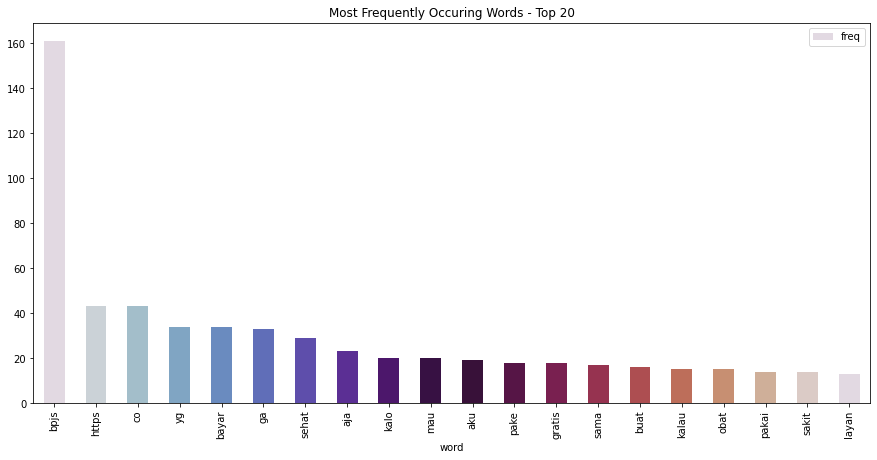

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [13]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [14]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 co
 bpjs
 https
 sudah
 hari
 tunggu
 respon
 tanggung
 sehat
 mobile
Cluster 1:
 bpjs
 https
 co
 yg
 bayar
 ga
 sehat
 aja
 mau
 kalo
Cluster 2:
 bri
 tmn
 sy
 dr
 dpt
 bpjs
 cm
 bbrp
 ketenagakerjaan
 sna




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


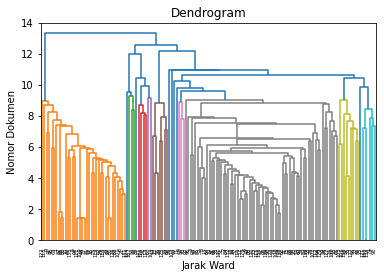

In [15]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

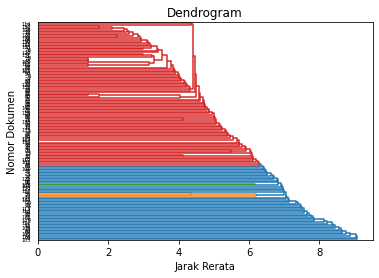

In [16]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()